## Run UDFs on DECTRIS live streams

* This requires the `dectris` extra of LiberTEM-live: `pip install libertem-live[dectris]`
* Make sure to adjust the network setup, `NAV_SHAPE` and trigger mode below to match the data source!
* This notebook requires the `bqplot` extra of LiberTEM: `pip install libertem[bqplot]`

In [1]:
import os
# adjust accordingly to your network setup:
DCU_API_HOST = os.environ.get('DCU_API_HOST', '127.0.0.1')
DCU_API_PORT = os.environ.get('DCU_API_PORT', 8910)
DCU_DATA_HOST = os.environ.get('DCU_DATA_HOST', '127.0.0.1')
DCU_DATA_PORT = os.environ.get('DCU_DATA_PORT', 9999)

In [2]:
from libertem_live.api import LiveContext
from libertem_live.detectors.dectris.acquisition import DectrisAcquisition
from libertem.udf.sumsigudf import SumSigUDF
from libertem.viz.bqp import BQLive2DPlot

In [3]:
ctx = LiveContext(plot_class=BQLive2DPlot)

In [4]:
def trigger(aq):
    # TODO: can trigger the scan here, if you have a microscope control API
    pass

In [5]:
aq = ctx.prepare_acquisition(
    'dectris',
    api_host=DCU_API_HOST,
    api_port=DCU_API_PORT,
    data_host=DCU_DATA_HOST,
    data_port=DCU_DATA_PORT,
    nav_shape=(128, 128),
    trigger_mode="exte",
    trigger=trigger,
    frames_per_partition=256,
)

In [6]:
res = ctx.run_udf(dataset=aq, udf=SumSigUDF(), plots=True)

Figure(axes=[Axis(label='x', scale=LinearScale(max=1.0, min=0.0)), Axis(label='y', orientation='vertical', sca…

Example output:

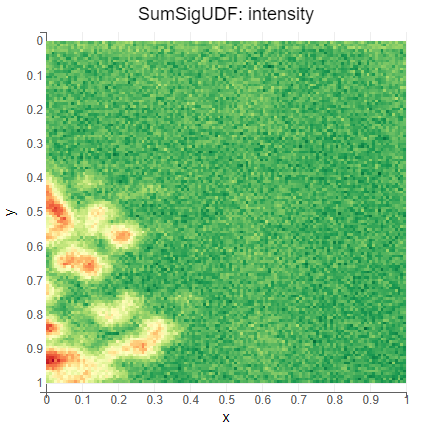